# MachineHack | Predict The Cost Of Book

## Solution : Rishi Raj Gupta (3rd Place Solution)

#### Hack-A-Thon organized by MachineHack during month of Sept-2019 to Oct-2019. Objective of this competition is to predict cost of book based on various features

Books are open doors to the unimagined worlds which is unique to every person. It is more than just a hobby for many. There are many among us who prefer to spend more time with books than anything else.

Here we explore a big database of books. Books of different genres, from thousands of authors. In this challenge, participants have to use the dataset to build a Machine Learning model to predict the price of books based on a given set of features.

<br> Size of training set: 6237 records <br>
Size of test set: 1560 records

#### FEATURES:

Title: The title of the book
<br>Author: The author(s) of the book.
<br>Edition: The edition of the book eg (Paperback,– Import, 26 Apr 2018)
<br>Reviews: The customer reviews about the book
<br>Ratings: The customer ratings of the book
<br>Synopsis: The synopsis of the book
<br>Genre: The genre the book belongs to
<br>BookCategory: The department the book is usually available at.
<br>Price: The price of the book (Target variable)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, string, nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
punct = string.punctuation + ")" + "(" + ":" + ";"

### Data Analysis + Cleaning

In [2]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')
sample = pd.read_excel('Sample_Submission.xlsx')

In [3]:
train.head(60)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62
5,ChiRunning: A Revolutionary Approach to Effort...,Danny Dreyer,"Paperback,– 5 May 2009",4.5 out of 5 stars,8 customer reviews,The revised edition of the bestselling ChiRunn...,Healthy Living & Wellness (Books),Sports,900.00
6,Death on the Nile (Poirot),Agatha Christie,"Paperback,– 5 Oct 2017",4.4 out of 5 stars,72 customer reviews,Agatha Christie’s most exotic murder mystery\n...,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery",224.00
7,Yoga Your Home Practice Companion: A Complete ...,Sivananda Yoga Vedanta Centre,"Hardcover,– Import, 1 Mar 2018",4.7 out of 5 stars,16 customer reviews,"Achieve a healthy body, mental alertness, and ...",Sports Training & Coaching (Books),Sports,836.00
8,Karmayogi: A Biography of E. Sreedharan,M S Ashokan,"Paperback,– 15 Dec 2015",4.2 out of 5 stars,111 customer reviews,Karmayogi is the dramatic and inspiring story ...,Biographies & Autobiographies (Books),"Biographies, Diaries & True Accounts",130.00
9,"The Iron King (The Accursed Kings, Book 1)",Maurice Druon,"Paperback,– 26 Mar 2013",4.0 out of 5 stars,1 customer review,‘This is the original game of thrones’ George ...,Action & Adventure (Books),Action & Adventure,695.00


In [4]:
test.head(60)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"
5,Understanding a Photograph (Penguin Modern Cla...,John Berger,"Paperback,– 7 Nov 2013",5.0 out of 5 stars,2 customer reviews,John Berger's writings on photography are some...,"Arts History, Theory & Criticism (Books)","Arts, Film & Photography"
6,Dance Music Manual,Rick Snoman,"Paperback,– Import, 5 Feb 2019",5.0 out of 5 stars,1 customer review,"Dance Music Manual, aimed at the novice and se...",Music Books,"Computing, Internet & Digital Media"
7,A Clash of Kings (A Song of Ice and Fire),George R.R. Martin,"Paperback,– 29 Mar 2012",4.3 out of 5 stars,117 customer reviews,"The second volume of A Song of Ice and Fire, t...",Action & Adventure (Books),"Crime, Thriller & Mystery"
8,An Era of Darkness: The British Empire in India,Shashi Tharoor,"Hardcover,– 27 Oct 2016",4.4 out of 5 stars,550 customer reviews,"In 1930, the American historian and philosophe...",Asian History,Politics
9,Doing Justice: A Prosecutor’s Thoughts on Crim...,Preet Bharara,"Paperback,– 19 Mar 2019",4.4 out of 5 stars,6 customer reviews,A Guardian Pick for 2019\nThe People vs. Putin...,True Accounts (Books),Action & Adventure


In [5]:
train.describe(include=['O','float'])

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
count,6237,6237,6237,6237,6237,6237,6237,6237,6237.000000
unique,5568,3679,3370,36,342,5549,345,11,NaN
top,A Game of Thrones (A Song of Ice and Fire),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,A Tinkle Double Digest is two Tinkle Digests i...,Action & Adventure (Books),Action & Adventure,NaN
freq,4,69,48,1375,1040,8,947,818,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.707516
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690.110657
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.180000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000


In [6]:
test.describe(include=['O','float'])

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
count,1560,1560,1560,1560,1560,1560,1560,1560
unique,1521,1224,1259,30,163,1519,225,11
top,The Five Greatest Warriors (Jack West Series),Agatha Christie,"Paperback,– 2016",5.0 out of 5 stars,1 customer review,A Guardian Pick for 2019\nThe People vs. Putin...,Action & Adventure (Books),Action & Adventure
freq,3,18,12,376,288,3,236,218


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
Title           6237 non-null object
Author          6237 non-null object
Edition         6237 non-null object
Reviews         6237 non-null object
Ratings         6237 non-null object
Synopsis        6237 non-null object
Genre           6237 non-null object
BookCategory    6237 non-null object
Price           6237 non-null float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
Title           1560 non-null object
Author          1560 non-null object
Edition         1560 non-null object
Reviews         1560 non-null object
Ratings         1560 non-null object
Synopsis        1560 non-null object
Genre           1560 non-null object
BookCategory    1560 non-null object
dtypes: object(8)
memory usage: 97.6+ KB


In [9]:
# Target feature is positive skewed therefore removing skewness
train.Price = np.log1p(train.Price)

In [10]:
# Removing outliers using Stats
q1 = train.Price.quantile(0.25)
q3 = train.Price.quantile(0.75)
iqr = q3-q1
upper = q3+2.5*iqr
lower = q1-2.5*iqr
x = np.where((train.Price < lower )| (train.Price.values>upper))
train.drop(index = x[0], inplace=True)
train.reset_index(drop=True, inplace=True)

In [11]:
# CLeaning Up Author feature
au_tr = set(train.Author).difference(set(test.Author))
au_te = set(test.Author).difference(set(train.Author))
train['Author_1'] = train.Author.apply(lambda x: 'other' if x in list(au_tr) else x)
test['Author_1'] = test.Author.apply(lambda x: 'other' if x in (au_te) else x)

In [12]:
# Extracting no. of days elapse since book published
train['time'] = train.Edition.str.extract(r"(\d* [a-zA-Z]* \d\d\d\d$)")
test['time']  = test.Edition.str.extract(r"(\d* [a-zA-Z]* \d\d\d\d$)")

import datetime
def days(text):
    try :
        x = datetime.datetime.strptime(str(text), "%d %b %Y")
    except :
        x = 0
    return(x)

train['time'] = train.time.apply(lambda x: days(x))
test['time']  = test.time.apply(lambda x: days(x))

def jj(text):
    try:
        x = datetime.datetime.now() - text
        y = x.days
    except:
        y = 0
    return(y)
train['time'] = train.time.apply(lambda x: jj(x))
test['time'] = test.time.apply(lambda x: jj(x))

In [13]:
# Extracting no. of years elapsed since book published
train['Date'] = train.Edition.str.extract(r"(\d\d\d\d$)")
test['Date'] = test.Edition.str.extract(r"(\d\d\d\d$)")

train.Date.fillna(2020, inplace=True)
test.Date.fillna(2020, inplace=True)

train.Date = train.Date.apply(lambda x: 2020-int(x))
test.Date = test.Date.apply(lambda x: 2020-int(x))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

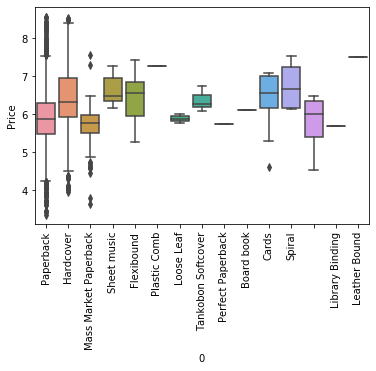

In [14]:
sns.boxplot(train.Edition.str.extract(r'(^[a-zA-Z|\s]*)')[0], train.Price)
#test.Edition.str.extract(r'(^[a-zA-Z|\s]*)')[0].value_counts()
plt.xticks(rotation=90)

In [15]:
train.Edition.str.extract(r'(^[a-zA-Z|\s]*)')[0].value_counts()

Paperback                5185
Hardcover                 813
Mass Market Paperback     155
Sheet music                24
Flexibound                 15
Cards                       8
Spiral                      4
                            4
Tankobon Softcover          3
Loose Leaf                  2
Leather Bound               1
Library Binding             1
Perfect Paperback           1
Board book                  1
Plastic Comb                1
Name: 0, dtype: int64

In [16]:
# Extracting info from Edition feature about type of binding used for book
train['Edition_1'] = train.Edition.str.extract(r'(^[a-zA-Z|\s]*)')
test['Edition_1'] = test.Edition.str.extract(r'(^[a-zA-Z|\s]*)')

train.Edition_1.replace({'':'Mass Market Paperback'}, inplace=True)
test.Edition_1.replace({'':'Mass Market Paperback'}, inplace=True)

g = train.Edition.str.extract(r'(^[a-zA-Z|\s]*)')[0].value_counts().index[0:5]

train.Edition_1 = train.Edition_1.apply(lambda x: 'other' if x not in g else x)
test.Edition_1 = test.Edition_1.apply(lambda x: 'other' if x not in g else x)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

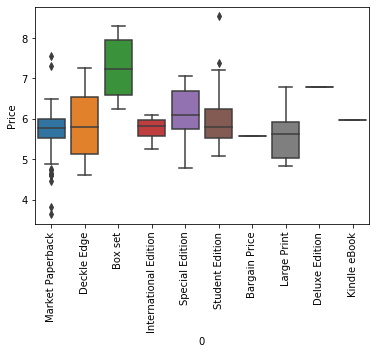

In [17]:
sns.boxplot(train.Edition.str.extract(r'^.*-* ([a-zA-Z|\s]* [a-zA-Z|\s]*),.*')[0], train.Price)
#test.Edition.str.extract(r'(^[a-zA-Z|\s]*)')[0].value_counts()
plt.xticks(rotation=90)

In [18]:
train.Edition.str.extract(r'^.*-* ([a-zA-Z|\s]* [a-zA-Z|\s]*),.*')[0].value_counts()

Market Paperback         154
Special Edition           18
Student Edition           14
Box set                   11
International Edition     10
Large Print                9
Deckle Edge                7
Kindle eBook               1
Deluxe Edition             1
Bargain Price              1
Name: 0, dtype: int64

In [19]:
test.Edition.str.extract(r'^.*-* ([a-zA-Z|\s]* [a-zA-Z|\s]*),.*')[0].value_counts()

Market Paperback         45
International Edition     4
Box set                   3
Special Edition           3
Student Edition           2
Deckle Edge               1
Kindle eBook              1
Large Print               1
Name: 0, dtype: int64

In [20]:
# Extracting info about types of edition used for book
train['Edition_2'] = train.Edition.str.extract(r'^.*-* ([a-zA-Z|\s]* [a-zA-Z|\s]*),.*')
test['Edition_2'] = test.Edition.str.extract(r'^.*-* ([a-zA-Z|\s]* [a-zA-Z|\s]*),.*')

g = train.Edition.str.extract(r'^.*-* ([a-zA-Z|\s]* [a-zA-Z|\s]*),.*')[0].value_counts().index[0:7]

train.Edition_2 = train.Edition_2.apply(lambda x: 'other' if x not in g else x)
test.Edition_2 = test.Edition_2.apply(lambda x: 'other' if x not in g else x)

In [21]:
train.Edition.str.extract(r'^.* -*(.*),.*')[0].value_counts()[0:7]

Import         613
Paperback      143
Illustrated     52
Edition         43
Unabridged      18
music           14
Print           12
Name: 0, dtype: int64

In [22]:
# Extracting info about kind of book published 
train['Edition_3'] = train.Edition.str.extract(r'^.* -*(.*),.*')
test['Edition_3'] = test.Edition.str.extract(r'^.* -*(.*),.*')
train.Edition_3.fillna('NA', inplace=True)
test.Edition_3.fillna('NA', inplace=True)

t = set(train.Edition_3.value_counts().index).difference(set(test.Edition_3.value_counts().index))
train.Edition_3 = train.Edition_3.apply(lambda x: np.NaN if x in list(t) else x)

In [23]:
train.dropna(inplace=True)
train.reset_index(drop=True, inplace=True)

In [24]:
# Extracting Reviews and Ratings from respective columns
train['Review_t'] = train.Reviews.str.extract(r"(^\d\.*\d*)")
test['Review_t'] = test.Reviews.str.extract(r"(^\d\.*\d*)")
train['Rating_t'] = train.Ratings.str.extract(r"(^\d+)")
test['Rating_t'] = test.Ratings.str.extract(r"(^\d+)")

In [25]:
# Generating new feature bu combining Reviews, Ratings, Days, Year
train['Rat_Rev'] = train.Rating_t.astype('float') * train.Review_t.astype('float')
test['Rat_Rev'] = test.Rating_t.astype('float') * test.Review_t.astype('float')

train['Raev'] = train.Rating_t.astype('float') / train.Review_t.astype('float')
test['Raev'] = test.Rating_t.astype('float') / test.Review_t.astype('float')

train['day_review'] = train.time.astype('float')/train.Review_t.astype('float')
test['day_review'] = test.time.astype('float')/test.Review_t.astype('float')

train['day_rating'] = train.time.astype('float')/train.Rating_t.astype('float')
test['day_rating'] = test.time.astype('float')/test.Rating_t.astype('float')

train['yr_review'] = train.Date.astype('float')/train.Review_t.astype('float')
test['yr_review'] = test.Date.astype('float')/test.Review_t.astype('float')

train['yr_rating'] = train.Date.astype('float')/train.Rating_t.astype('float')
test['yr_rating'] = test.Date.astype('float')/test.Rating_t.astype('float')

train['yr_Rat_Rev'] = train.Date.astype('float') * train.Rat_Rev.astype('float')
test['yr_Rat_Rev'] = test.Date.astype('float') * test.Rat_Rev.astype('float')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

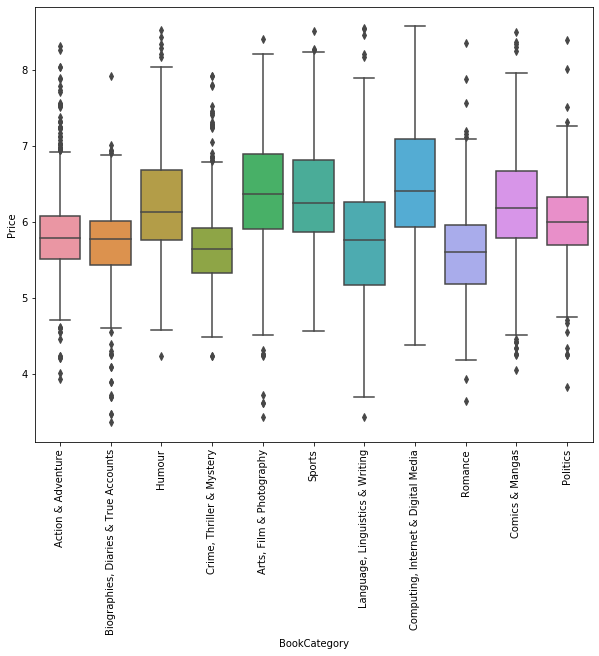

In [26]:
fig = plt.figure(figsize=(10,8))
sns.boxplot(train.BookCategory, train.Price)
plt.xticks(rotation=90)

In [27]:
train.Genre.str.extract('([a-zA-Z|)|(]*)$')[0].value_counts()

(Books)           4785
Books              224
Mangas             180
Design              98
Textbooks           96
                  ... 
Greece               1
Italian              1
Compilers            1
Fundamentalism       1
                     1
Name: 0, Length: 122, dtype: int64

In [28]:
# Extracing last word of Genre. This will help in determining kind of book from Genre category
train['Genre_1'] = train.Genre.str.extract('([a-zA-Z|)|(]*)$')
test['Genre_1']  = test.Genre.str.extract('([a-zA-Z|)|(]*)$')

train.Genre_1.replace({'(Books)': 'Books'}, inplace=True)
test.Genre_1.replace({'(Books)': 'Books'}, inplace=True)


g = train.Genre.str.extract('([a-zA-Z|)|(]*)$')[0].value_counts().index[0:14]
train['Genre_1'] = train.Genre_1.apply(lambda x: 'other' if x not in g else x)
test['Genre_1']  = test.Genre_1.apply(lambda x: 'other' if x not in g else x)

In [29]:
# Further more cleaning Genre featrue column for modeling
au_tr = set(train.Genre).difference(set(test.Genre))
au_te = set(test.Genre).difference(set(train.Genre))
train['Genre_t'] = train.Genre.apply(lambda x: 'other' if x in list(au_tr) else x)
test['Genre_t'] = test.Genre.apply(lambda x: 'other' if x in (au_te) else x)

In [30]:
# Generating Meta features for Title, Synopsis columns
def words(text):
    return(len(str(text).lower().split())/len(str(text)))

def n_unique_word(text):
    return(len(set(str(text).lower().split()))/len(str(text)))

def letter(text):
    return(len(str(text)))

def n_clean_words(text):
    s = [w for w in str(text).split() if w not in stopwords and w not in list(punct)]
    return(len(s)/len(str(text)))

def n_stopwords(text):
    s = [w for w in str(text).split() if w in stopwords]
    return(len(s)/len(str(text)))

def n_punctuation(text):
    s = [w for w in str(text).lower().split() if w in list(punct)]
    return(len(s)/len(str(text)))

def n_title(text):
    s = [w for w in str(text).split() if w.istitle()]
    return(len(s)/len(str(text)))

def n_Upper(text):
    s = [w for w in str(text).split() if w.isupper()]
    return(len(s)/len(str(text)))

def n_Lower(text):
    s = [w for w in str(text).split() if w.islower()]
    return(len(s)/len(str(text)))

train['Title_unique_word'] = train.Title.apply(lambda x: n_unique_word(x))
test['Title_unique_word'] = test.Title.apply(lambda x: n_unique_word(x))

train['Synopsis_unique_word'] = train.Synopsis.apply(lambda x: n_unique_word(x))
test['Synopsis_unique_word'] = test.Synopsis.apply(lambda x: n_unique_word(x))

train['Title_count'] = train.Title.apply(lambda x: words(x))
test['Title_count'] = test.Title.apply(lambda x: words(x))

train['Synopsis_count'] = train.Synopsis.apply(lambda x: words(x))
test['Synopsis_count'] = test.Synopsis.apply(lambda x: words(x))

train['Title_count_char'] = train.Title.apply(lambda x: letter(x))
test['Title_count_char'] = test.Title.apply(lambda x: letter(x))

train['Synopsis_count_char'] = train.Synopsis.apply(lambda x: letter(x))
test['Synopsis_count_char'] = test.Synopsis.apply(lambda x: letter(x))

train['Title_n_st'] = train.Title.apply(lambda x: n_stopwords(x))
test['Title_n_st'] = test.Title.apply(lambda x: n_stopwords(x))

train['Synopsis_n_st'] = train.Synopsis.apply(lambda x: n_stopwords(x))
test['Synopsis_n_st'] = test.Synopsis.apply(lambda x: n_stopwords(x))

train['Title_n_punct'] = train.Title.apply(lambda x: n_punctuation(x))
test['Title_n_punct'] = test.Title.apply(lambda x: n_punctuation(x))

train['Synopsis_n_punct'] = train.Synopsis.apply(lambda x: n_punctuation(x))
test['Synopsis_n_punct'] = test.Synopsis.apply(lambda x: n_punctuation(x))

train['Title_title_word'] = train.Title.apply(lambda x: n_title(x))
test['Title_title_word'] = test.Title.apply(lambda x: n_title(x))

train['Synopsis_title_word'] = train.Synopsis.apply(lambda x: n_title(x))
test['Synopsis_title_word'] = test.Synopsis.apply(lambda x: n_title(x))

train['Title_upper_word'] = train.Title.apply(lambda x: n_Upper(x))
test['Title_upper_word'] = test.Title.apply(lambda x: n_Upper(x))

train['Synopsis_upper_word'] = train.Synopsis.apply(lambda x: n_Upper(x))
test['Synopsis_upper_word'] = test.Synopsis.apply(lambda x: n_Upper(x))

train['Title_lower_word'] = train.Title.apply(lambda x: n_Lower(x))
test['Title_lower_word'] = test.Title.apply(lambda x: n_Lower(x))

train['Synopsis_lower_word'] = train.Synopsis.apply(lambda x: n_Lower(x))
test['Synopsis_lower_word'] = test.Synopsis.apply(lambda x: n_Lower(x))

train['Title_n_clean_word'] = train.Title.apply(lambda x: n_clean_words(x))
test['Title_n_clean_word'] = test.Title.apply(lambda x: n_clean_words(x))

train['Synopsis_n_clean_word'] = train.Synopsis.apply(lambda x: n_clean_words(x))
test['Synopsis_n_clean_word'] = test.Synopsis.apply(lambda x: n_clean_words(x))

#train['Title_0'] = train.Title.str.extract(r"(^.*):+(.*$)")[0]
#train['Title_1'] = train.Title.str.extract(r"(^.*):+(.*$)")[1]

#test['Title_0'] = test.Title.str.extract(r"(^.*):+(.*$)")[0]
#test['Title_1'] = test.Title.str.extract(r"(^.*):+(.*$)")[1]

#train['Title_0'] = train.Title_0.apply(lambda x: words(x))
#test['Title_0'] = test.Title_0.apply(lambda x: words(x))

#train['Title_1'] = train.Title_1.apply(lambda x: words(x))
#test['Title_1'] = test.Title_1.apply(lambda x: words(x))

In [31]:
# Implementing TFIDF on Title, Synopsis, Author, Genre, BookCategory 
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words='english', use_idf=True)
x = tfidf.fit_transform(pd.concat([train.Synopsis, test.Synopsis], axis = 0).str.lower())

tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words='english', use_idf=True)
z = tfidf.fit_transform(pd.concat([train.Title, test.Title], axis = 0).str.lower())

tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words='english', use_idf=True)
e = tfidf.fit_transform(pd.concat([train.Genre_t, test.Genre_t], axis = 0).str.lower())

tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words='english', use_idf=True)
a = tfidf.fit_transform(pd.concat([train.Author_1, test.Author_1], axis = 0).str.lower())

tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words='english', use_idf=True)
b = tfidf.fit_transform(pd.concat([train.BookCategory, test.BookCategory], axis = 0).str.lower())

In [32]:
# Reducing Dimensionality of sparse matrix to respective components
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components=150)
x = pd.DataFrame(pca.fit_transform(x), columns = [a for a in range(150)])

pca = TruncatedSVD(n_components=100)
z = pd.DataFrame(pca.fit_transform(z), columns = [a for a in range(150,250)])

pca = TruncatedSVD(n_components=60)
e = pd.DataFrame(pca.fit_transform(e), columns = [a for a in range(250,310)])

pca = TruncatedSVD(n_components=80)
a = pd.DataFrame(pca.fit_transform(a), columns = [a for a in range(310,390)])

pca = TruncatedSVD(n_components=11)
b = pd.DataFrame(pca.fit_transform(b), columns = [a for a in range(390,401)])

In [33]:
# Concatenating featrues created using TFIDF into main train, testset
tr = x.iloc[:6207,:]
te = x.iloc[6207:,:]
te.reset_index(drop = True, inplace=True)

tr_z = z.iloc[:6207,:]
te_z = z.iloc[6207:,:]
te_z.reset_index(drop = True, inplace=True)

tr_e = e.iloc[:6207,:]
te_e = e.iloc[6207:,:]
te_e.reset_index(drop = True, inplace=True)

tr_a = a.iloc[:6207,:]
te_a = a.iloc[6207:,:]
te_a.reset_index(drop = True, inplace=True)

tr_b = b.iloc[:6207,:]
te_b = b.iloc[6207:,:]
te_b.reset_index(drop = True, inplace=True)

train = pd.concat([train, tr, tr_z, tr_e, tr_a, tr_b], axis = 1)
test = pd.concat([test, te, te_z, te_e, te_a, te_b], axis = 1)

In [34]:
train.reset_index(drop = True, inplace=True)
train.shape, test.shape

((6207, 445), (1560, 444))

In [35]:
train.drop(columns = ['Author','Title', 'Edition', 'Reviews','Ratings', 'Synopsis','Genre'], inplace=True)
test.drop(columns = ['Author','Title', 'Edition', 'Reviews','Ratings', 'Synopsis','Genre'], inplace=True)

In [36]:
# Converting into respective data type
train.Author_1 = train.Author_1.astype('category')
train.BookCategory = train.BookCategory.astype('category')
train.Edition_1 = train.Edition_1.astype('category')
train.Edition_2 = train.Edition_2.astype('category')
train.Edition_3 = train.Edition_3.astype('category')
train.Genre_t = train.Genre_t.astype('category')
train.Rating_t = train.Rating_t.astype('float')
train.Review_t = train.Review_t.astype('float')
train.Genre_1 = train.Genre_1.astype('category')

test.Author_1 = test.Author_1.astype('category')
test.BookCategory = test.BookCategory.astype('category')
test.Edition_1 = test.Edition_1.astype('category')
test.Edition_2 = test.Edition_2.astype('category')
test.Edition_3 = test.Edition_3.astype('category')
test.Genre_t = test.Genre_t.astype('category')
test.Rating_t = test.Rating_t.astype('float')
test.Review_t = test.Review_t.astype('float')
test.Genre_1 = test.Genre_1.astype('category')

In [37]:
train_label = train.Price
train.drop(columns = 'Price', inplace=True)

In [38]:
# Encoded Author, Genre, Genre_1 into 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train.Author_1 = le.fit_transform(train.Author_1)
test.Author_1 = le.transform(test.Author_1)

train.Genre_1 = le.fit_transform(train.Genre_1)
test.Genre_1 = le.transform(test.Genre_1)

train.Genre_t = le.fit_transform(train.Genre_t)
test.Genre_t = le.transform(test.Genre_t)

train.shape, test.shape

((6207, 437), (1560, 437))

In [39]:
# Rest columns converted into dummies
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)
print(train.shape, test.shape)

(6207, 468) (1560, 468)


In [40]:
# Basic feature generation using all featrues present in trainset and testset
train['sum'] = np.sum(train, axis = 1)
train['min'] = np.min(train, axis = 1)
train['max'] = np.max(train, axis = 1)
train['std'] = np.std(train, axis = 1)
train['skew'] = train.skew(axis = 1)
train['kurt'] = train.kurt(axis = 1)
train['mean'] = np.mean(train, axis=1)
#train['median'] = np.median(train, axis=1)

test['sum'] = np.sum(test, axis = 1)
test['min'] = np.min(test, axis = 1)
test['max'] = np.max(test, axis = 1)
test['std'] = np.std(test, axis = 1)
test['skew'] = test.skew(axis = 1)
test['kurt'] = test.kurt(axis = 1)
test['mean'] = np.mean(test, axis=1)
#test['median'] = np.median(test, axis=1)

In [41]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
train_label.reset_index(drop=True, inplace=True)

In [42]:
train.shape, test.shape

((6207, 475), (1560, 475))

### Modeling

In [43]:
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import RandomizedSearchCV, train_test_split

def rmsle(y_pred, y_test) : 
    return(1-(np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_test))**2))))
metric = make_scorer(rmsle)

In [44]:
def CrossVal(dataX,dataY,mode,cv=3):
    score=cross_val_score(mode,dataX , dataY, cv=cv, scoring=metric)
    print("cv score",np.mean(score))
    return(np.mean(score))

In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(train, train_label, test_size = 0.2, random_state = 2019)
CrossVal(xtrain, ytrain ,lgb.LGBMRegressor())

cv score 0.9252517622968991


0.9252517622968991

In [47]:
CrossVal(xtrain, ytrain, xgb.XGBRegressor())

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:50:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:51:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:51:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cv score 0.9231074543415377


0.9231074543415377

In [48]:
# LGB with tuned hyper parameter
model = lgb.LGBMRegressor(bagging_fration=0.76999999999999991, boosting_type='gbdt',
       class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.28999999999999998, importance_type='split',
       lambda_l1=0.36999999999999994, lambda_l2=0.050000000000000003,
       learning_rate=0.03, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_gain_split=0.001, min_split_gain=0.0,
       n_estimators=1000, n_jobs=-1, num_leaves=86, objective=None,
       random_state=975, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

model.fit(train, train_label)
answer = model.predict(test)

In [49]:
# Solution
sample.Price = np.exp(answer)-1
sample.to_excel('Solution.xlsx', index=False)